# Classification of Kepler Planet Data

Matthew Karnes
 
December 2019

This project was completed on its own as an effort to practice and refine necessary skills.

Kepler was a mission launched by NASA in 2009 to attempt to locate and discover exoplanets within the Milky Way through use of the Kepler
Space Telescope.  The telescope was a space craft that orbited Earth and would scan the depths of space for transit events, which is where something passes in front of a distant star and interrupts the light visible.  These transit events are then flagged and studied to determine whether or not the event was caused by an exoplanet or by a false positive, which could be another non-planetary mass or a mistake in the sensors. 
The data of the objects flagged by Kepler is available for use at https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative.  These Object of Interest are labeled as either Confirmed, False Positive, or Candidate.  The purpose of this project is to delve into the data of each planet to determine what causes a planet to be confirmed or rejected and develop a model to then predict whether or not a new Object of Interest is an exoplanet or not.

# Implementation

I begin by importing the necessary models.  I will be using Pandas and Numpy to manipulate and investigate the dataset and Matplotlib and Seaborn to visualize the data.  Model building will be handled by Scikit-Learn and I will try three different model types in an attempt to find the simplest, but most effective model. 

In [1]:
#Import data manipulation tools
import pandas as pd
import numpy as np 

#Import data visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Set pandas to display all columns in the dataset
pd.set_option('display.max_columns', None)

#Import scoring metrics for classification
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Imputing and Scaling data
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Import classifiers to be used
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV

# Exploratory Data Analysis

The dataset comes with 85 extra lines of information naming all of the various features and as such I specify the header as line 86.

In [2]:
#Load dataset into a usable dataframe and set header to the correct starting point
df = pd.read_csv(r"Kepler_Planet_Data.csv" , header=86)

df.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

As seen in the head of the dataset above and the info below there are 83 different features in a variety of data types
and 9564 different rows of data.  There are also multiple rows that are completely devoid of non-null entries and 
some other rows are missing some amount of values.  Where as features that are completely empty will most likely be removed I will
later impute new information into the rows missing data.

In [3]:
#Gather basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2305 non-null object
koi_disposition      9564 non-null object
koi_vet_stat         9564 non-null object
koi_vet_date         9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_disp_prov        9564 non-null object
koi_comment          8355 non-null object
koi_period           9564 non-null float64
koi_time0bk          9564 non-null float64
koi_time0            9564 non-null float64
koi_eccen            9201 non-null float64
koi_longp            0 non-null float64
koi_impact           9201 non-null float64
koi_duration 

By using pandas .describe function below I can see the first glimpse of the distributions of the data.  Early indications are that several features have a large positive skew meaning that there will be a large tail as the x-axis of the distributions increases.  This will most likely be the case in features such as "koi_prad", "koi_impact", "koi_max_sngle_ev", and several other features. 

In [4]:
print(df.describe())

rowid         kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  \
count  9564.000000  9.564000e+03  8054.000000    9564.000000    9564.000000   
mean   4782.500000  7.690628e+06     0.480829       0.208595       0.232748   
std    2761.033321  2.653459e+06     0.476928       4.767290       0.422605   
min       1.000000  7.574500e+05     0.000000       0.000000       0.000000   
25%    2391.750000  5.556034e+06     0.000000       0.000000       0.000000   
50%    4782.500000  7.906892e+06     0.334000       0.000000       0.000000   
75%    7173.250000  9.873066e+06     0.998000       0.000000       0.000000   
max    9564.000000  1.293514e+07     1.000000     465.000000       1.000000   

       koi_fpflag_co  koi_fpflag_ec     koi_period  koi_time0bk     koi_time0  \
count    9564.000000    9564.000000    9564.000000  9564.000000  9.564000e+03   
mean        0.197512       0.120033      75.671358   166.183251  2.454999e+06   
std         0.398142       0.325018    1334.744046    67.9

Here I plot the distribution of "koi_max_sngle_ev" and as expected there is a large positive skew. Later on as I move into feature engineering I 
will have to work to alleviate any problems that may arise due to this skew.  I, however, do not remove the data that causes this large skew as it could be extremely important.  There could be a large number of confirmed planets after a certain threshold or before that would not be accounted for if the data were removed.

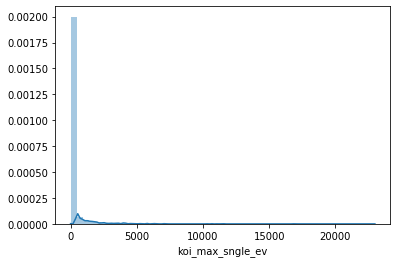

In [26]:
sns.distplot(df["koi_max_sngle_ev"])
plt.title("Distribution of koi_max_sngle_ev Feature")

Another interesting observation to be made about the data is in the feature "koi_fpflag_ss". This feature is defined in the documentation as a flag that is set if the Object of Interest could have been caused by an eclipsing binary star.  As such this flag should have values of only 0 or 1, or no and yes.  From the data description I can see that it has a max of 465.  Below it can be seen that there is a single entry of 465 instead of 0 or 1.  This is almost assuredly a mistake and as such will need to be removed.  This will be removed as it is not an outlier in the data but almost certainly an error.

In [17]:
df.koi_fpflag_nt.value_counts()

0      8033
1      1530
465       1
Name: koi_fpflag_nt, dtype: int64

In [19]:
df.loc[df["koi_fpflag_nt"] == 465]

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
3008,3009,10934674,K00477.01,Kepler-567 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.0,465,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,16.542953,169.65031,2455002.65,0.0,NaN,0.329,3.8516,NaN,726.0,0.024368,2.2311,LS+MCMC,2.31,0.1229,89.41,611.0,32.94,31.84,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.1828,0.5324,q1_q17_dr25_koi,6.060774,30.508324,36.1,1,63.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.4997,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010934/010934674/dv/kplr010934674-20160209...,010/010934/010934674/dv/kplr010934674-001-2016...,5215.0,4.518,0.28,0.867,0.904,NaN,q1_q17_dr25_stellar,297.67261,48.302311,14.687,15.408,14.606,14.378,14.282,13.267,12.789,12.724,0.639,19.844845,48.30228,0.15,-0.1,0.00001,-0.00014,-0.03,0.08,0.08,0.02,0.19,0.19


In [3]:
#Remove fpflag_nt outlier
df = df[df.koi_fpflag_nt != 465]

df.koi_fpflag_nt.value_counts()

0    8033
1    1530
Name: koi_fpflag_nt, dtype: int64

As the model will work to determine if an Object of Interest is a Confirmed planet or a False Positive it is best to see if it is more likely 
to find an actual Exoplanet or a False Positive.  Below I can see that there is an imbalance meaning that it is more likely to find a False Positive which for the model means it will be better trained to find False Positives and as such Accuracy will be a less accurate metric.

Text(0.5, 1.0, 'Number of Confirmed Planets vs False_Positives')

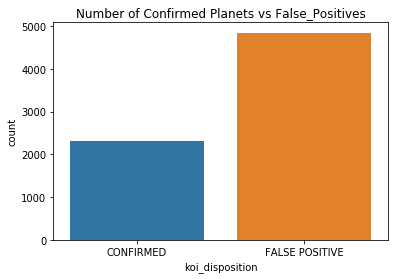

In [68]:
sns.countplot(x = "koi_disposition", data = df_reduced)

plt.title("Number of Confirmed Planets vs False_Positives")

Now to look at how some of the features influence the disposition on Objects of Interest.

It can be seen here that the Fit Type used influences the outcome based on the fact that types other than LS+MCMC do not yield many if any Confirmed Planets.  This could be due to the fact that these other methods may be less reliable or just not used as much.  It is important, however, as it will teach the model that types other than LS+MCMC have a greater chance of being a False Positive.

Text(0.5, 1, 'Total Confirmed or False per Fit Type')

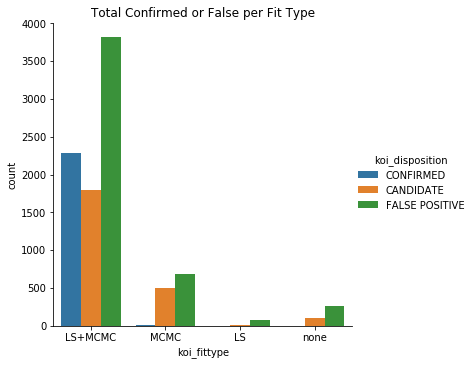

In [13]:
sns.catplot(x="koi_fittype", kind = "count", hue = "koi_disposition", data = df)
plt.title("Total Confirmed or False per Fit Type")

This graph shows the distribution of the Object of Interests planetary radii in units of Earth Radii.  The majority of Confirmed cases hover around 1 Earth Radii while False Positives can have much larger radii.

Text(0.5, 1, 'Distribution of Planetary Radii')

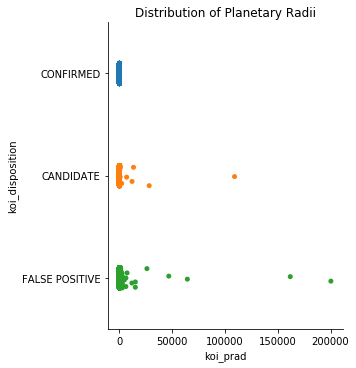

In [4]:
sns.catplot(x="koi_prad",y ="koi_disposition", data = df)
plt.title("Distribution of Planetary Radii")

Here is a plot of how Objects of Interest are classified based on how many previously Confirmed Planets were found in the system in question.
This shows an amount of bias in the Kepler Mission as it would seem that the more planets that have been confirmed in a system, the more likely it is to have new Confirmations. This is important as knowing that other planets have been found nearby means that it is more likely for the current Object of Interest to be a planet.

Text(0.5, 1, 'Total Confirmed or False per Planets found in a region')

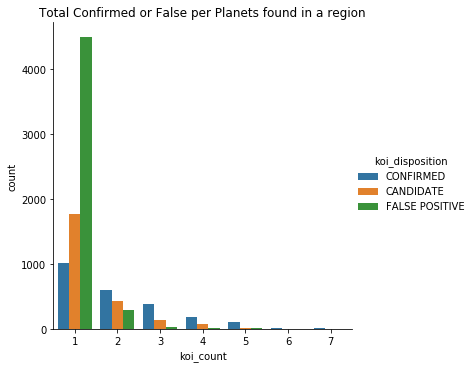

In [14]:
sns.catplot(x="koi_count", kind = "count", hue = "koi_disposition", data = df)
plt.title("Total Confirmed or False per Planets found in a region")

I also look at a couple of the features that are binary flags. These flags are specifically there to denote an anomaly that will most likely lead to the Object being identified as a False Positive. These may give too much information to the model though and may need to be removed later.

Text(0.5, 1, 'Total Confirmed or False per Planets per fpflag_ss')

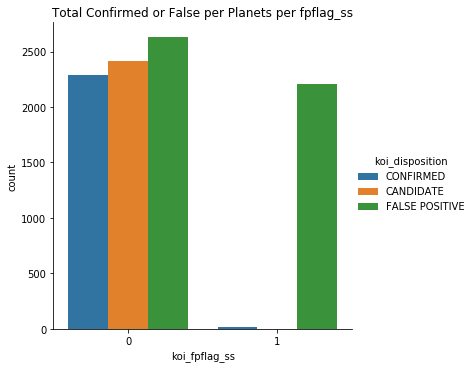

In [26]:
sns.catplot(x="koi_fpflag_ss", kind = "count", hue = "koi_disposition", data = df)
plt.title("Total Confirmed or False per Planets per fpflag_ss")

Text(0.5, 1, 'Total Confirmed or False per Planets per fpflag_co')

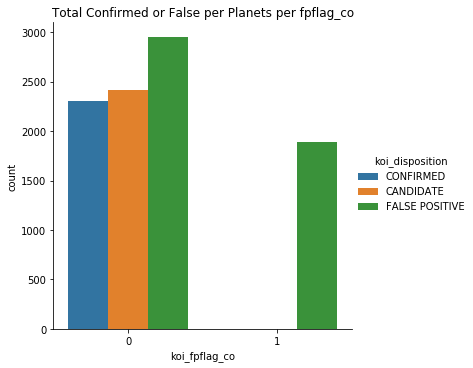

In [25]:
sns.catplot(x="koi_fpflag_co", kind = "count", hue = "koi_disposition", data = df)
plt.title("Total Confirmed or False per Planets per fpflag_co")

In order to determine if any of the features are highly collinear a heatmap of the various features is produced.  From this heatmap I can see that the only possibly troubling collinearities would be between "koi_rmag" and "koi_jmag" but neither will be removed for now though they will be if  deemed detrimental to the model.

Text(0.5, 1, 'Correlation Heatmap of Features')

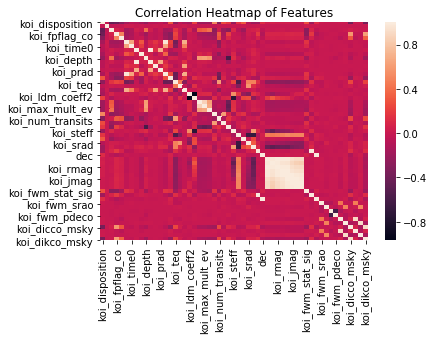

In [20]:
#Create dataframe of correlations between features
df_corr = df_reduced.corr()

#Create heatmap of correlations
sns.heatmap(df_corr)
plt.title("Correlation Heatmap of Features")

Now I remove all of the Objects that are not confirmed or de-confirmed.  The model will only care about determining whether a planet is Confirmed or a False Positive and as such the Candidates will not be of use other than to possibly use as a test case in the future.

In [4]:
#Remove all candidates
df_reduced = df[df.koi_disposition != "CANDIDATE"]

df_reduced.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,171.595550,2455004.596,0.0,NaN,0.701,1.65450,NaN,603.3,0.024064,1.98635,LS+MCMC,2.75,0.0374,85.41,1406.0,926.16,8.750,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2844,0.3661,q1_q17_dr25_koi,4.749945,33.191900,40.9,1,515.0,1.0,q1_q17_dr25_tce,01111111111111111000000000000000,0.3090,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010854/010854555/dv/kplr010854555-20160209...,010/010854/010854555/dv/kplr010854555-001-2016...,6031.0,4.438,0.07,1.046,1.095,NaN,q1_q17_dr25_stellar,288.75488,48.226200,15.5

# Feature Selection and Engineering

Now to begin the process of choosing the features that will be used to build the model.  

First I will cut any features that are deemed to be non-essential for a variety of reasons listed here.

- Non-categorical Text Data - Within the dataset there are various parameters given that describe the Objects of Interest such as given names, IDs, row IDs, data drives where information is stored, who first analyzed the data etc.

- Empty Features - These features are entirely made up of zeros or are completely empty with no relevant information.  Whether or not this is due to user error or the possibility that a binary flag was set to NaN instead of zero is not known.  No assumptions can be made as to what this data may have been so it is dropped from use.

- Unit Conversion - According to the documentation "koi_time0bk" and "koi_timebk" are the same feature under different unit conversions and as such provide the same data.  "koi_time0bk" will be removed.

- Leakage - The feature "koi_score" gives a numerical score of 0 to 1.00 based on how likely the Mission believes an Object of Interest to be a Confirmed Planet. This feature provides too much information to the model and would most likely be one of the most important features were it fed to the model.  I wish to only use the data that comes from the Objects, not what is believed about them, and as such will remove "koi_score".

The majority of features removed will be for non-categorical text data as there are many features that contain comments and names that are irrelevant.

In [5]:
#Remove unneeded features
df_reduced = df_reduced.drop(["rowid", "kepid", "kepoi_name", "kepler_name", "koi_vet_stat",	
                             "koi_vet_date", "koi_pdisposition", "koi_score", "koi_disp_prov", 
                             "koi_comment", "koi_longp", "koi_ingress", "koi_model_dof", "koi_model_chisq",
                             "koi_sage", "koi_sparprov", "koi_trans_mod", "koi_tce_delivname", "koi_limbdark_mod", 
                             "koi_ldm_coeff4",	"koi_ldm_coeff3", "koi_datalink_dvr", "koi_datalink_dvs", "koi_eccen",
                             "koi_time0bk", "koi_quarters", "koi_parm_prov"], axis=1)

df_reduced.head(5)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,0,0,0,0,9.488036,2455003.539,0.146,2.95750,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,CONFIRMED,0,0,0,0,54.418383,2454995.514,0.586,4.50700,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
3,FALSE POSITIVE,0,1,0,0,1.736952,2455003.308,1.276,2.40641,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,CONFIRMED,0,0,0,0,2.525592,2455004.596,0.701,1.65450,603.3,0.024064,1.98635,LS+MCMC,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
5,CONFIRMED,0,0,0,0,11.094321,2455004.201,0.538,4.59450,1517.5,0.036779,0.67324,LS+MCMC,3.90,0.0992,88.11,835.0,114.81,16.360,0.2889,0.3511,9.046456,55.204865,66.5,3,95.0,1.0,0.0975,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132,NaN,19.752406,48.22471,-0.120,0.140,0.00004,NaN,0.040,-0.070,0.080,-0.020,-0.080,0.080


## Correlations

Here I find the correlations between each feature and the target.  Since "koi_disposition" is a categorical feature it is converted from "Confirmed" and "False Positive" to 1 and 0 respectively in order to find any correlations.  The df.corr function used defaults to a Pearson correlation which used in conjunction with a binary classifier is equivalent to a Point-Biserial Correlation.

In [6]:
# Convert Confirmed to 1 and False Positive to 0
# Create Dict
outcome = {"CONFIRMED" : 1, "FALSE POSITIVE" : 0}

# Replace Confirmed and False Positive
df_correlations = df_reduced.replace({"koi_disposition" : outcome})

# Make into a float64
df_correlations["koi_disposition"] = df_correlations["koi_disposition"].astype(int)

"koi_disposition" has now been changed to an int in order to find the correlations as seen below.  The greatest correlations come from "koi_count", "koi_fpflag_ss", "koi_fpflag_co", "koi_dicco_msky", and "koi_fpflag_nt".  This says that a higher amount of previously found planets will lead to more confirmed planets, while a negative flag does the same. These correlations also tell that features such as the "koi_rmag" which is a band of stellar magnitude, are not as important to determining the disposition.  In essence features relating to the star the Object passes in front of are not as important as features about the Object itself and its movement past the star.   

In [7]:
#Find greatest correlations between features and the target feature

#Find all correlations and sort 
correlations = df_correlations.corr()["koi_disposition"].sort_values()

#Print the most negative correlations
print(correlations.head(15), '\n')

#Print the most positive correlations
print(correlations.tail(15))

koi_fpflag_ss      -0.454618
koi_fpflag_co      -0.413481
koi_dicco_msky     -0.373558
koi_fpflag_nt      -0.359145
koi_dikco_msky     -0.357884
koi_fpflag_ec      -0.301760
koi_num_transits   -0.291670
koi_teq            -0.260628
koi_depth          -0.228574
koi_steff          -0.215282
koi_max_mult_ev    -0.196130
koi_model_snr      -0.194913
koi_fwm_sra        -0.184524
koi_smass          -0.182746
koi_max_sngle_ev   -0.182135
Name: koi_disposition, dtype: float64 

koi_rmag            0.045368
koi_zmag            0.045709
koi_kepmag          0.047240
koi_gmag            0.061173
dec                 0.123324
koi_fwm_sdec        0.127002
koi_slogg           0.170351
koi_bin_oedp_sig    0.175040
koi_ldm_coeff1      0.211880
koi_tce_plnt_num    0.262904
koi_fwm_stat_sig    0.278625
koi_incl            0.300304
koi_smet            0.316574
koi_count           0.508473
koi_disposition     1.000000
Name: koi_disposition, dtype: float64


As many of the features were heavily skewed I take the most skewed and apply a Log Transformation and find the correlations of these new features to see if any new useful data arises.  

The use of the transformation does create new and interesting correlations, including increasing the correlation of "koi_max_sngle_ev" and raising "koi_prad" to one of the most important features in terms of correlation.  I will now use these new Log Transformed features in the final model.

In [8]:
#Take log transformation of skewed features to determine
#if better correlations are formed
logtrans = np.log(df_reduced[["koi_impact", "koi_duration", "koi_period",
                              "koi_ror", "koi_srho", "koi_prad", "koi_sma",
                              "koi_teq", "koi_dor", "koi_max_sngle_ev", 
                              "koi_max_mult_ev",  "koi_model_snr", "koi_num_transits",
                              "koi_srad"]])

#Rename columns
logtrans.columns = [str(col) + "_log" for col in logtrans.columns]

#Add target for correlations
logtrans = pd.concat([logtrans, df_correlations["koi_disposition"]], axis=1)

#Find all correlations and sort 
logcorrelations = logtrans.corr()["koi_disposition"].sort_values()

#Print the new correlations
print(logcorrelations.head(15), '\n')

koi_prad_log           -0.371915
koi_ror_log            -0.327254
koi_max_sngle_ev_log   -0.302431
koi_impact_log         -0.259638
koi_max_mult_ev_log    -0.228058
koi_teq_log            -0.205836
koi_num_transits_log   -0.199865
koi_srad_log           -0.182988
koi_model_snr_log      -0.142692
koi_duration_log       -0.113166
koi_period_log          0.087803
koi_sma_log             0.090827
koi_dor_log             0.173532
koi_srho_log            0.196209
koi_disposition         1.000000
Name: koi_disposition, dtype: float64 



I now put together the final dataset of features that will be used for the models.  It will include all of the numerical features that were deem unessential, log transformations of all of the skewed features, and "koi_fittype" the only categorical feature that was found to be useful.  "koi_fittype" is one-hot encoded so that it is in a usable format. One-hot encoding essentially turns a categorical feature into an amount of binary features equal to the amount of categories in the feature.  These new features are concatenated with the log transformed features and then those features are concatenated with the original numerical features.   

In [9]:
#One-Hot Encode categorical data

#Select the necessary column
categorical = df_reduced[["koi_fittype"]]

#One-Hot Encode
categorical = pd.get_dummies(categorical)

#Add log transformed features
logtrans = logtrans.drop(["koi_disposition"], axis=1)

logcat = pd.concat([categorical, logtrans], axis=1)

#Prepare features dataframe

#Drop target from features
features = df_reduced.drop(["koi_disposition", "koi_fittype"], axis=1)

#Join features and log and categorical data
features = pd.concat([features, logcat], axis=1)

features.head(5)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_fittype_LS,koi_fittype_LS+MCMC,koi_fittype_MCMC,koi_fittype_none,koi_impact_log,koi_duration_log,koi_period_log,koi_ror_log,koi_srho_log,koi_prad_log,koi_sma_log,koi_teq_log,koi_dor_log,koi_max_sngle_ev_log,koi_max_mult_ev_log,koi_model_snr_log,koi_num_transits_log,koi_srad_log
0,0,0,0,0,9.488036,2455003.539,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,0,1,0,0,-1.924149,1.084344,2.250032,-3.801197,1.165635,0.815365,-2.461581,6.675823,3.211247,1.636245,3.348880,3.577948,4.955827,-0.075802
1,0,0,0,0,54.418383,2454995.514,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,0,1,0,0,-0.534435,1.505632,3.996702,-3.577195,1.106475,1.040277,-1.296819,6.093570,4.355426,1.949855,3.001193,3.250374,3.218876,-0.075802
3,0,1,0,0,1.736952,2455003.308,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,1,0,0,0.243730,0.878136,0.552132,-0.948313,-1.510498,3.510351,-3.623092,7.240650,1.187233,3.665267,6.295072,6.225746,6.431331,-0.234457
4,0,0,0,0,2.525592,2455004.596,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,0,1,0,0,-0.355247,0.503499,0.926475,-3.727038,0.686299,1.011601,-3.286085,7.248504,2.169054,1.558133,3.502306,3.711130,6.244167,0.044973
5,0,0,0,0,11.094321,2455004.201,0.538,4.59450,1517.5,0.036779,0.67324,3.90,0.0992,88.11,835.0,114.81,16.360,0.2889,0.3511,9.046456,55.204865,66.5,3,95.0,1.0,0.0975,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,15.714,16.234,15.677,15.492,15.441,14.528,14.113,14.132,NaN,19.752406,48.22471,-0.120,0.140,0.00004,NaN,0.040,-0.070,0.080,-0.020,-0.080,0.080,0,1,0,0,-0.619897,1.524860,2.406433,-3.302828,-0.395653,1.360977,-2.310617,6.727432,2.794839,2.202373,4.011051,4.197202,4.553877,-0.028399


The targets are then the "koi_disposition" and the features are in the dataset just created.  I replace any infinities that may be present within the features dataset with NaN so that I can later impute.  Then I split the features and targets into test and train splits with a split of 70% train and 30% test.

In [11]:
#Define Targets
targets = pd.DataFrame(df_reduced["koi_disposition"])

#Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

#Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 40)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(5000, 72)
(2143, 72)
(5000, 1)
(2143, 1)


Now I impute the features so that there are not any missing values.  This is not necessary for more robust methods such as random forests, but is necessary for less robust methods.  I will use a newer technique that has been somewhat recently added to Scikit Learn which is K-Nearest Neighbors Imputation.  This method works by finding the nearest neighbors of the missing data and imputing based off the nearest non-missing data.  I use a k of 85 as stated by P. Jonsson and C. Wohlin, "An evaluation of k-nearest neighbour imputation using Likert data," 10th International Symposium on Software Metrics, 2004. Proceedings., Chicago, Illinois, USA, 2004, pp. 108-118. the k is suggested to be the square root of the total complete cases.  Which in this case comes to around 85.

In [10]:
#Create imputer with 85 nearest neighbors
imputer = KNNImputer(n_neighbors=85)

#Train on the training features
imputer.fit(X)

#Transform both training data and testing data
X = imputer.transform(X)
X_test = imputer.transform(X_test)

In [45]:
print("Missing values in training features: ", np.sum(np.isnan(X)))
print("Missing values in testing features:  ", np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


We then scale the data so as to account for the different units that the data has.  MinMaxScaling does not change the distribution of the data but brings the distances between the data to be more consistent.  This is not necessary for Linear Regression or Random Forests but is necessary for k-Nearest Neighbors and Support Vector Machines as they measure the distance between the data. 

In [11]:
#Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit on the training data
scaler.fit(X)

#Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

I now define a function that takes in the type of model to use, trains it on the train features and labels, and produces a test report consisting of the Precision, Recall, F1-Score, and Cross Validated Accuracy.

In [154]:
#Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):

    target_names = ["Confirmed", "False"]
    
    #Train the model
    model.fit(X, y)
    
    #Make predictions and evalute
    model_pred = model.predict(X_test)
    report = classification_report(y_test, model_pred, target_names= target_names)
    cross_val = cross_val_score(model, X, y, cv=5)
    
    print(report)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
    return 

# Model Selection

I now test three different models and one dummy classifier in order to get a baseline evaluation to work from.

The models will be:

- LinearSVC
- k-Nearest Neighbors
- Random Forest classifier

I use the default parameters at first to find which model works best and then optimize that specific model.

Running the dummy below shows that it cannot name a confirmed planet whatsoever but has only slight difficulty naming a False Positive. This is due to the imbalanced classes that is hopefully rectified by the use of actual models.

In [155]:
#Get a baseline
dummy = DummyClassifier(strategy= "most_frequent")

fit_and_evaluate(dummy)

precision    recall  f1-score   support

   Confirmed       0.00      0.00      0.00       657
       False       0.69      1.00      0.82      1486

    accuracy                           0.69      2143
   macro avg       0.35      0.50      0.41      2143
weighted avg       0.48      0.69      0.57      2143

Accuracy: 0.67 (+/- 0.00)


In [156]:
#Linear SVC
lsvc = LinearSVC(random_state=0)

fit_and_evaluate(lsvc)

precision    recall  f1-score   support

   Confirmed       1.00      0.99      1.00       657
       False       1.00      1.00      1.00      1486

    accuracy                           1.00      2143
   macro avg       1.00      1.00      1.00      2143
weighted avg       1.00      1.00      1.00      2143

Accuracy: 1.00 (+/- 0.00)


In [157]:
#K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)

fit_and_evaluate(knn)

precision    recall  f1-score   support

   Confirmed       1.00      0.99      0.99       657
       False       1.00      1.00      1.00      1486

    accuracy                           1.00      2143
   macro avg       1.00      0.99      1.00      2143
weighted avg       1.00      1.00      1.00      2143

Accuracy: 1.00 (+/- 0.00)


In [158]:
#Random Forest

rfc = RandomForestClassifier(random_state=0)

fit_and_evaluate(rfc)

precision    recall  f1-score   support

   Confirmed       1.00      0.97      0.99       657
       False       0.99      1.00      0.99      1486

    accuracy                           0.99      2143
   macro avg       0.99      0.99      0.99      2143
weighted avg       0.99      0.99      0.99      2143

Accuracy: 0.99 (+/- 0.01)


# Model Evaluation

As seen above there seems to be something odd happening here.  All of the models are giving almost 100% precision, recall, and f1 scores.  This is almost assuredly a sign of overfitting on the data.  This could possibly be due to having not enough data or possibly due to having a feature that is influencing the model too much.  I believe that it is possibly the various flags that are used to determine if an Object should be under greater observation.  These flags are only used when an Object is most likely a False Positive and as such will be removed and the models will be retrained to see the difference.  

I follow the same procedure from before except I remove the four "fpflag" features.  I then split into a 70 - 30 train, test split and then impute and scale. 

In [12]:
#Reduce the features to try and counter overfitting

features_reduced = features.drop(["koi_fpflag_nt","koi_fpflag_ss",	"koi_fpflag_co", "koi_fpflag_ec"], axis=1)

#Replace the inf and -inf with nan (required for later imputation)
features_reduced = features_reduced.replace({np.inf: np.nan, -np.inf: np.nan})

X_reduce, X_reduce_test, y_reduce, y_reduce_test = train_test_split(features_reduced, targets, test_size = 0.3, random_state = 40)

print(X_reduce.shape)
print(X_reduce_test.shape)
print(y_reduce.shape)
print(y_reduce_test.shape)

(5000, 68)
(2143, 68)
(5000, 1)
(2143, 1)


In [23]:
#Takes in a model, trains the model, and evaluates the model on the test set
def reduced_fit(model):

    target_names = ["Confirmed", "False"]
    
    #Train the model
    model.fit(X_reduce, y_reduce)
    
    #Make predictions and evalute
    model_pred = model.predict(X_reduce_test)
    report = classification_report(y_reduce_test, model_pred, target_names= target_names)
    cross_val = cross_val_score(model, X_reduce, y_reduce, cv=5)
    
    print(report)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
    return 

In [14]:
#Create imputer with 85 nearest neighbors
imputer = KNNImputer(n_neighbors=85)

#Train on the training features
imputer.fit(X_reduce)

#Transform both training data and testing data
X_reduce = imputer.transform(X_reduce)
X_reduce_test = imputer.transform(X_reduce_test)

In [16]:
print("Missing values in training features: ", np.sum(np.isnan(X_reduce)))
print("Missing values in testing features:  ", np.sum(np.isnan(X_reduce_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [20]:
#Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit on the training data
scaler.fit(X_reduce)

#Transform both the training and testing data
X_reduce = scaler.transform(X_reduce)
X_reduce_test = scaler.transform(X_reduce_test)

Now to get the baseline and fit into the models as before.

In [41]:
#Get a baseline
dummy = DummyClassifier(strategy= "most_frequent")

reduced_fit(dummy)

precision    recall  f1-score   support

   Confirmed       0.00      0.00      0.00       657
       False       0.69      1.00      0.82      1486

    accuracy                           0.69      2143
   macro avg       0.35      0.50      0.41      2143
weighted avg       0.48      0.69      0.57      2143

Accuracy: 0.67 (+/- 0.00)


In [24]:
#Linear SVC
lsvc = LinearSVC(random_state=0)

reduced_fit(lsvc)

precision    recall  f1-score   support

   Confirmed       0.93      0.96      0.95       657
       False       0.98      0.97      0.98      1486

    accuracy                           0.97      2143
   macro avg       0.96      0.96      0.96      2143
weighted avg       0.97      0.97      0.97      2143

Accuracy: 0.96 (+/- 0.01)


In [25]:
#K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)

reduced_fit(knn)

precision    recall  f1-score   support

   Confirmed       0.81      0.93      0.87       657
       False       0.97      0.91      0.94      1486

    accuracy                           0.91      2143
   macro avg       0.89      0.92      0.90      2143
weighted avg       0.92      0.91      0.92      2143

Accuracy: 0.90 (+/- 0.01)


In [26]:
#Random Forest

rfc = RandomForestClassifier(random_state=0)

reduced_fit(rfc)

precision    recall  f1-score   support

   Confirmed       0.96      0.96      0.96       657
       False       0.98      0.98      0.98      1486

    accuracy                           0.98      2143
   macro avg       0.97      0.97      0.97      2143
weighted avg       0.98      0.98      0.98      2143

Accuracy: 0.98 (+/- 0.01)


As seen above the new dataset without the "fpflag" features gives much more reasonable precision, recalls, and f1-scores.  It is most likely that the flags were providing too much information to the models essentially acting as a yes or no for the model to make an easy decision off of.  Without the flags the models are much more adaptable and can work off of raw data alone instead of a flag set by the Mission's operators.

# Optimization

The model that provided the best results was the Random Forest Classifier and as such I move forward with optimizing this model through the use of a RandomizedSearchCV.  I set a grid of parameters for the model to randomly work through for four cross validations each with 25 different combinations of parameters.  This should hopefully lead to a better optimized model but more optimization may be necessary. 

In [27]:
#Set the parameter grid that will be optimized

#Number of trees
n_estimators = [100, 400, 700, 1000]

#Max number of features at each split
max_features = ["auto", "sqrt", "log2"]

#Max number of levels in a tree
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)

#Minimum number of samples to split a node
min_samples_split = [2, 5, 10, 15, 20]

#Minimum number of samples required at each leaf
min_samples_leaf = [1, 2, 5, 10, 15]


In [28]:
#Make a grid of parameters
param_grid = {"n_estimators": n_estimators,
              "max_features": max_features,
              "max_depth": max_depth,
              "min_samples_split": min_samples_split,
              "min_samples_leaf" : min_samples_leaf}

In [29]:
#Create a randomized search cv with the parameter grid
rf_randomcv = RandomizedSearchCV(estimator= rfc, 
                                param_distributions = param_grid, 
                                n_iter=25, cv=4, verbose=1, 
                                random_state=42, n_jobs=-1,  
                                return_train_score=True)

I now run the RandomizedSearchCV.

In [32]:
rf_randomcv.fit(X_reduce, y_reduce)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
#Print best parameters
print(rf_randomcv.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [34]:
#Create an unoptimized Random Forest
default_model = RandomForestClassifier(random_state= 0)

#Create an optimized Random Forest
final_model = rf_randomcv.best_estimator_

final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
#Fit the unoptimized Forest and time it
%%timeit -n 1 -r 5
default_model.fit(X_reduce, y_reduce)

2.2 s ± 53 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [36]:
#Fit the optimized Forest and time it
%%timeit -n 1 -r 5
final_model.fit(X_reduce, y_reduce)

8.48 s ± 67 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [37]:
#Make predictions on the optimized and unoptimized models on the test set
default_pred = default_model.predict(X_reduce_test)
final_pred = final_model.predict(X_reduce_test)

target_names = ["Confirmed", "False"]

default_report= classification_report(y_reduce_test, default_pred, target_names= target_names)
final_report = classification_report(y_reduce_test, final_pred, target_names= target_names)
print(default_report)
print(final_report)

precision    recall  f1-score   support

   Confirmed       0.96      0.96      0.96       657
       False       0.98      0.98      0.98      1486

    accuracy                           0.98      2143
   macro avg       0.97      0.97      0.97      2143
weighted avg       0.98      0.98      0.98      2143

              precision    recall  f1-score   support

   Confirmed       0.96      0.95      0.96       657
       False       0.98      0.98      0.98      1486

    accuracy                           0.97      2143
   macro avg       0.97      0.97      0.97      2143
weighted avg       0.97      0.97      0.97      2143



As seen above the optimized model is about 4 times slower than the optimized model and offers almost the exactly the same results.  In this case the optimized model actually has a lower recall for Confirmed planets than the unoptimized.  The optimized is still very important though as it can be used to pull out the most important features and find what is making the model form its decision.

In [39]:
#Extract the feature importances into a dataframe
feature_results = pd.DataFrame({"feature": list(features_reduced.columns), 
                                "importance": final_model.feature_importances_})

#Show the top 10 most important
feature_results = feature_results.sort_values("importance", ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,koi_dicco_msky,0.116494
1,koi_dikco_msky,0.114147
2,koi_prad,0.071161
3,koi_count,0.061677
4,koi_prad_log,0.044694
5,koi_ror,0.043778
6,koi_ror_log,0.033239
7,koi_max_mult_ev,0.031407
8,koi_model_snr_log,0.030906
9,koi_max_mult_ev_log,0.028785


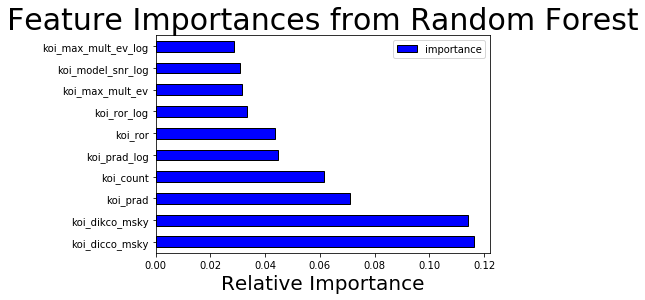

In [40]:
# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

# Most Important Features

- koi_dicco_msky and koi_dikco_msky - These are the two most important Features and they are measures of pixel offsets to determine whether an Object of Interest's crossing event is cause by a planet or background interference.

- koi_prad - The next most important feature is the planetary radius of the Object of Interest in question.

- koi_count - As somewhat expected the amount of planets that have already been found in an area is also one of the most important features.  This shows that the Mission has a bias towards searching in areas that have already had confirmed planets.

# Conclusions

The most important conclusions to be made from this are that:

- A model can be made that can classify whether an Object of Interest in the Kepler Mission can be made to predict with an F1 Score of 96 for Confirmed Planets and 98 for False Positives.

- The most important features in determining whether or not an Object of Interest is a planet or not are the "koi_dicco_msky","koi_dikco_msky", "koi_prad", and the "koi_count".

- All Confirmed Planets were found to have a radii close to one Earth radius and as such a larger radii will likely lead to a False Positive disposition.

- For best results it is recommended the model not use the Flag features as they provide too much information to the model.

